In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import seaborn as sns
import zipfile
import os
import os
import pandas as pd
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Handwritten data/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_data')

In [ ]:
dataset_path = '/content/extracted_data/dataset'

In [ ]:
folder_path = '/content/extracted_data/dataset/7/7'
print(os.listdir(folder_path))


['4935.png', '4566.png', '8385.png', '2355.png', '5093.png', '474.png', '8913.png', '3711.png', '15.png', '9342.png', '4780.png', '7570.png', '7198.png', '4500.png', '5733.png', '2757.png', '9960.png', '1553.png', '10406.png', '6529.png', '3906.png', '8645.png', '6925.png', '5819.png', '10124.png', '8320.png', '5060.png', '10225.png', '6417.png', '7427.png', '4147.png', '4805.png', '2271.png', '9198.png', '3441.png', '10708.png', '4550.png', '1760.png', '8834.png', '5137.png', '9764.png', '1185.png', '4220.png', '3920.png', '7902.png', '2288.png', '10152.png', '6238.png', '6108.png', '2412.png', '9722.png', '6792.png', '4312.png', '4710.png', '1705.png', '7237.png', '1607.png', '3189.png', '1482.png', '2685.png', '801.png', '549.png', '8374.png', '3232.png', '4567.png', '678.png', '6996.png', '4512.png', '8404.png', '8815.png', '10333.png', '2442.png', '8192.png', '807.png', '2331.png', '1823.png', '2191.png', '30.png', '1598.png', '36.png', '1828.png', '7480.png', '8755.png', '10601.p

In [ ]:
from PIL import Image
img = Image.open('/content/extracted_data/dataset/7/7/5192.png')
display(img)


(28, 28)
13140
(784,)
51


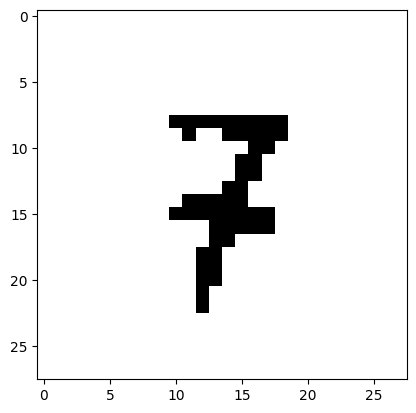

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def load_binary_image_flat(path, size=(28,28), threshold=None):
    img = Image.open(path)
    arr = np.array(img)
    barr = arr[:,:,3]
    #print(barr)
    print(barr.shape)   # shape = (28, 28, 4)
    print(barr.sum())
    if threshold is not None:
        barr = (barr > threshold).astype(np.uint8)
    return barr.flatten()

flat_vec = load_binary_image_flat(
    '/content/extracted_data/dataset/7/7/5192.png',
    size=(28,28),
    threshold=128
)
print(flat_vec.shape)
print(flat_vec.sum())

plt.imshow(flat_vec.reshape(28,28), cmap='binary')

In [ ]:
from PIL import Image
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

def load_binary_image_flat(path, size=(28,28),threshold=128):
    img = Image.open(path)
    arr = np.array(img)
    barr = arr[:, :, 3]
    #print(barr)
    #print(barr.shape)
    #print(barr.sum())
    if threshold is not None:
        barr = (barr > threshold).astype(np.uint8)
    return barr.flatten()

root = Path('/content/extracted_data/dataset')
data, labels = [], []

for digit_dir in sorted(root.iterdir()):
    if not digit_dir.is_dir():
        continue
    label = int(digit_dir.name)
    for img_path in digit_dir.rglob('*.png'):
        vec = load_binary_image_flat(str(img_path))
        data.append(vec)
        labels.append(label)

0


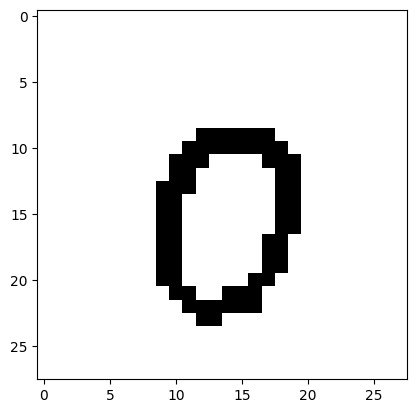

In [ ]:
plt.imshow(data[20].reshape(28,28), cmap='binary')
print(labels[20])

In [ ]:
df = pd.DataFrame(data)
df['label'] = labels

In [ ]:
print("DataFrame shape:", df.shape)

DataFrame shape: (107730, 785)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
pixel_cols = df.columns[:-1]

In [ ]:
norm_df=df

In [ ]:
X = df[pixel_cols]
y = df['label']
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (107730, 784)
y shape: (107730,)


# TensorFlow Model

**📄 Dataset Description: Handwritten Digits Dataset (Non-MNIST)**

*  The dataset used in this project is a custom handwritten digits dataset sourced from Kaggle, distinct from the widely used MNIST dataset.
*   It consists of grayscale images of handwritten digits from 0 to 9, organized into class-specific folders. Each digit class is stored inside a folder named after the corresponding digit (0, 1, ..., 9).

*  📐 Dataset Statistics

| Attribute                  | Value                     |
|---------------------------|---------------------------|
| Total datapoints (images) | **107,730**               |
| Image size                | **28×28** pixels          |
| Number of features        | **784** (28×28 flattened) |
| Total classes             | **10** (digits 0–9)       |
| Data format               | **Pandas DataFrame**      |
| Input shape (X)           | **(107730, 784)**         |
| Label shape (y)           | **(107730,)**             |
| Data type                 | **uint8** (0–255 values)  |


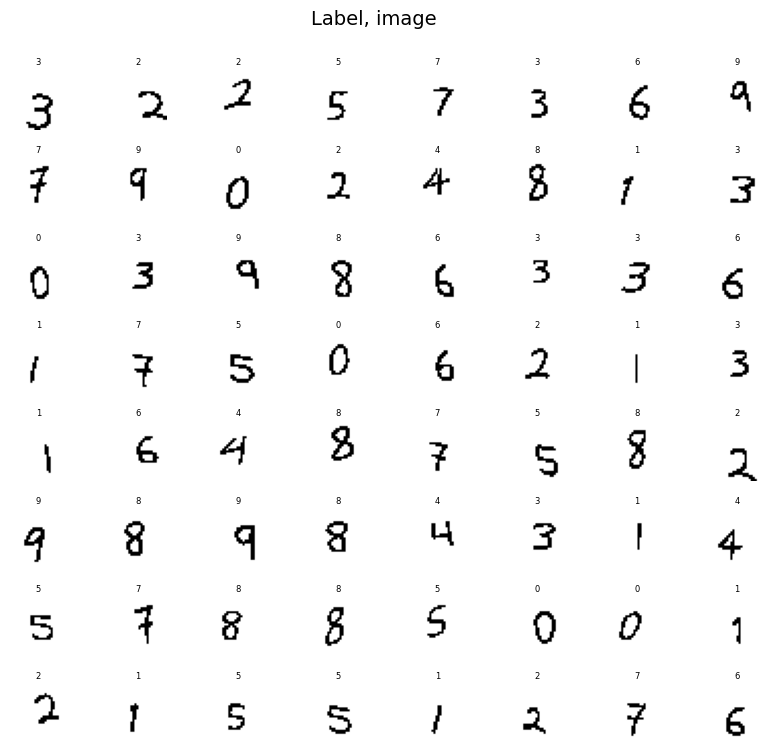

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    image = X.iloc[random_index].values.reshape(28, 28)

    ax.imshow(image, cmap='binary')

    ax.set_title(str(y.iloc[random_index]), fontsize=6)
    ax.set_axis_off()

fig.suptitle("Label, image", fontsize=14)
plt.show()


In [ ]:
#norm_df[pixel_cols] = norm_df[pixel_cols].astype(np.float32) / 255.0

In [ ]:
X_norm=norm_df[pixel_cols]
y=norm_df['label']

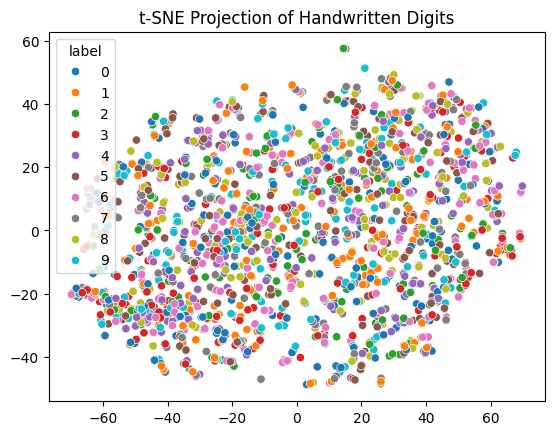

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X.sample(2000))  # Sample for speed
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y.sample(2000), palette='tab10', legend='full')
plt.title("t-SNE Projection of Handwritten Digits")
plt.show()


✨ **t-SNE Visualization Description**

The above t-SNE plot represents a 2D projection of the original high-dimensional handwritten digit images (28×28 pixels = 784 features) into two dimensions while preserving the local structure of the data.  

Each point in the plot corresponds to one image from the dataset, and the color of each point indicates its associated digit class (0–9).

From the plot:
- **Clusters** of points belonging to the same digit class can be observed, suggesting that similar handwritten digits are placed close to each other in the high-dimensional space.
- Some **overlapping regions** exist where different digit classes (e.g., 3 and 5, or 4 and 9) are mixed together. This indicates that certain digits may share similar visual features and could be harder for a model to distinguish.
- **Separation** between easily distinguishable digits like "0" and "1" is more prominent.

Overall, this visualization provides an intuitive understanding of how the digits are distributed and how separable different classes are, which is valuable for evaluating the expected performance of classification models.

---

🔥 **Insight**

**"The t-SNE plot shows that while many handwritten digits form well-defined clusters, some classes overlap, suggesting potential challenges in classification."**


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [ ]:
tf.random.set_seed(1234)
model=Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(256,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='linear')
],name='my_model')
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [ ]:
history=model.fit(
    X_train,y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8351 - loss: 0.5243 - val_accuracy: 0.9979 - val_loss: 0.0080
Epoch 2/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9971 - loss: 0.0101 - val_accuracy: 0.9970 - val_loss: 0.0106
Epoch 3/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9975 - loss: 0.0079 - val_accuracy: 0.9991 - val_loss: 0.0035
Epoch 4/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9994 - loss: 0.0026 - val_accuracy: 0.9981 - val_loss: 0.0054
Epoch 5/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9969 - loss: 0.0104 - val_accuracy: 0.9874 - val_loss: 0.0424
Epoch 6/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9976 - loss: 0.0087 - val_accuracy: 0.9995 - val_loss: 0.0011
Epoch 7/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 6.1874e-05 - val_accuracy: 1.0000 - val_loss: 7.1668e-05
Epoch 8/15
1212/1212 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 1.0000 - loss: 

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")

Train Accuracy: 1.0000


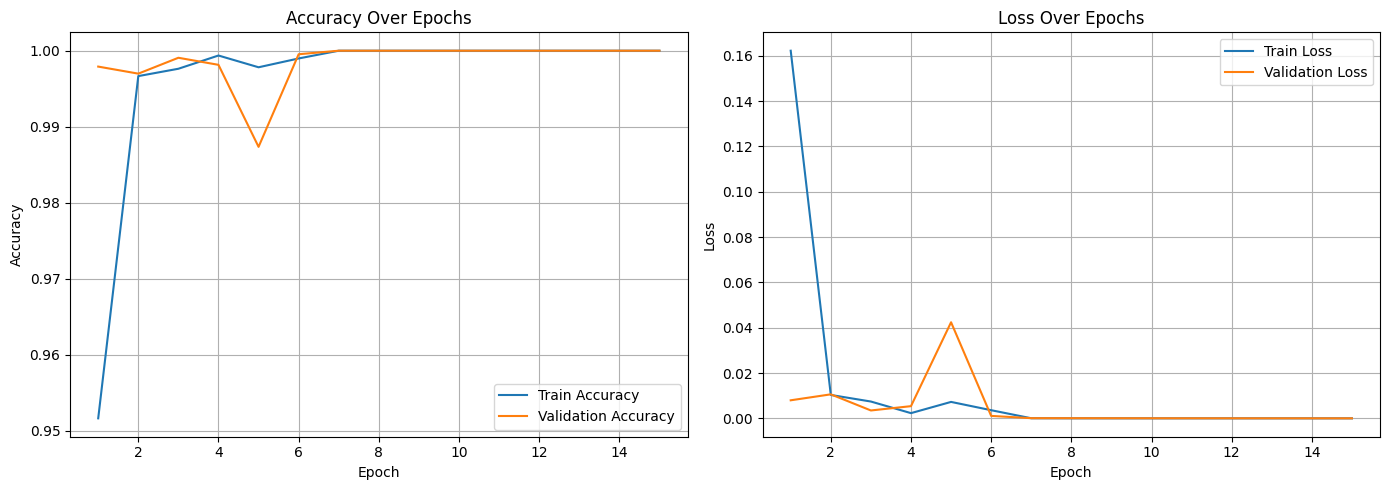

In [ ]:
epochs = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(14,5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 6.9192e-06
Test Accuracy: 1.0000


In [ ]:
logits = model.predict(X_test)
y_pred = tf.argmax(logits, axis=1).numpy()

674/674 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


<Figure size 800x600 with 0 Axes>

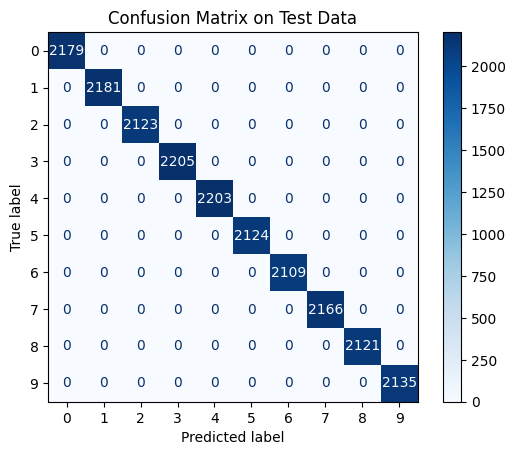

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Test Data")
plt.show()


# Real Time Prediction

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(path, target_size=(28, 28)):
    img = Image.open(path).convert('L')

    img = img.resize(target_size)

    img = np.array(img)
    #img = 255 - img
    img = (img < 128).astype(np.uint8)

    img = img.reshape(1, 28*28)
    #plt.imshow(img, cmap='gray')

    return img


17


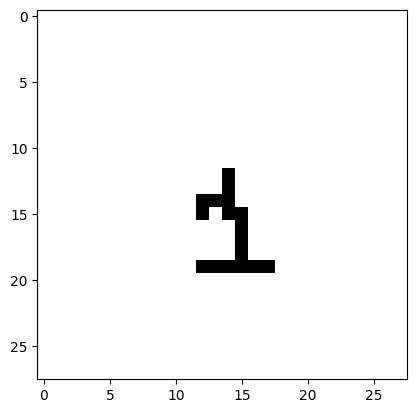

In [ ]:
img_array = preprocess_image('/content/drive/MyDrive/Colab Notebooks/Handwritten data/1.jpg')
print(img_array.sum())

plt.imshow(img_array.reshape(28,28), cmap='binary')
plt.show()

In [ ]:
logits = model.predict(img_array)
prediction = np.argmax(logits)
print(f"Predicted Digit: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Digit: 1


In [ ]:
a=[0,1,2]
print(a)

[0, 1, 2]


In [ ]:
b=a
b[0]=99
print(b)
print(a)

[99, 1, 2]
[99, 1, 2]


In [1]:
import copy